In [2]:
import sys, json
sys.path.append("/visuworks/Blindless_AIFFELTON/Models") 

import check_result_full_size, loss, metrics, preprocess_full_size, data_generator_full_size
import os, random
import tensorflow as tf
import matplotlib.pyplot as plt


MODEL_PATH = '/visuworks/Blindless_AIFFELTON/script/Dense_Unet/model_parameters/30epochs_g_clahe.h5'
HISTORY_PATH = '/visuworks/Blindless_AIFFELTON/script/Dense_Unet/history/30epochs_g_clahe_history.json'
SOURCE = '/visuworks/Dataset/Selected Dataset 2'

2024-01-23 06:49:11.659295: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 06:49:11.659317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 06:49:11.660214: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 06:49:11.665218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 06:49:12.242539: W tensorflow/compiler/tf2

2024-01-23 05:46:25.421310: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-23 05:46:25.455876: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-23 05:46:25.456097: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

63/63 [==============================] - 33s 490ms/step - loss: 0.2157 - sensitivity: 0.8074 - specificity: 0.9741 - accuracy: 0.9626
Loss: 0.2157163769006729
Sensitivity: 0.8073784708976746
Specificity: 0.9740608930587769
Accuracy: 0.962637186050415


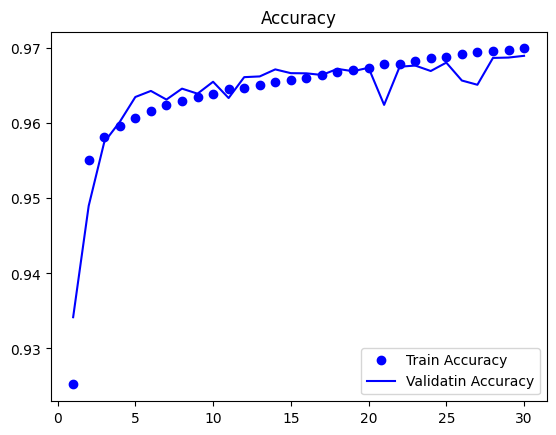

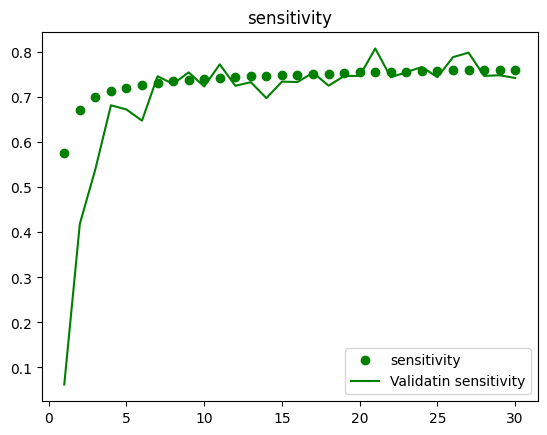

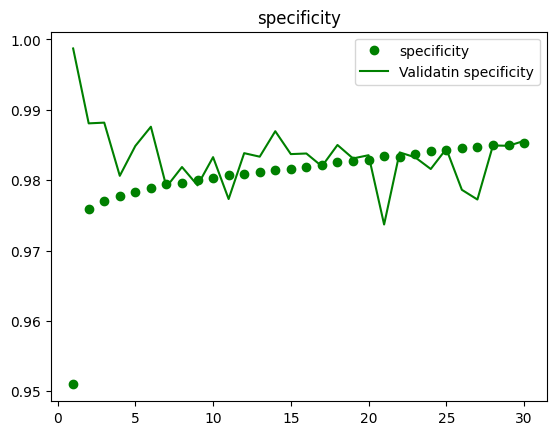

<Figure size 640x480 with 0 Axes>

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)
test_preproc = preprocess_full_size.build_augmentation(is_train=False)
test_generator = data_generator_full_size.FullSizedDataGenerator(
    data_generator_full_size.SOURCE, 
    augmentation=test_preproc,
    is_train=False
)
metrics.print_evaluation(model, test_generator)

# Plot model history
check_result_full_size.plot_history(HISTORY_PATH)

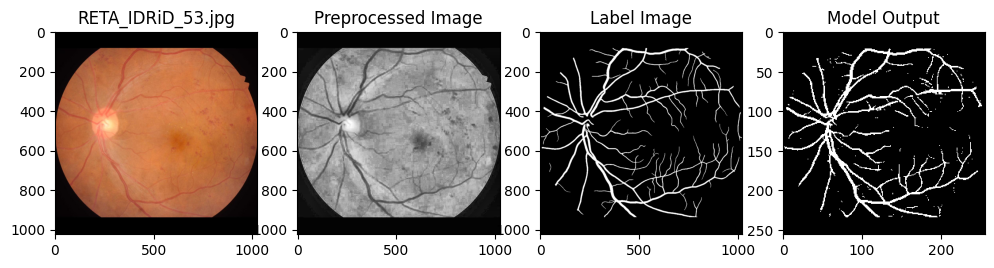

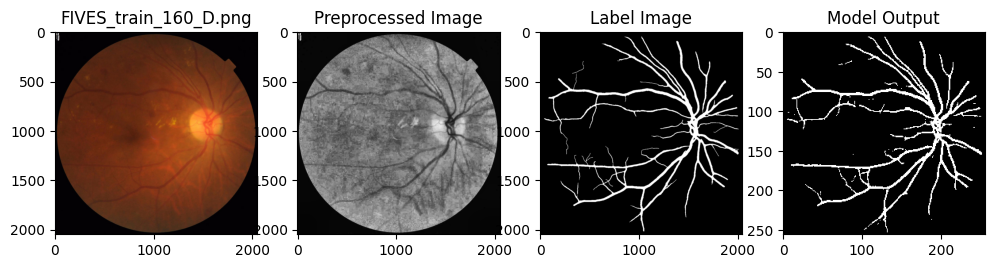

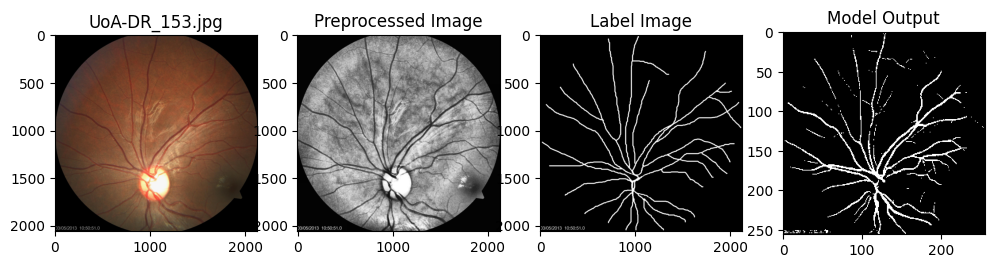

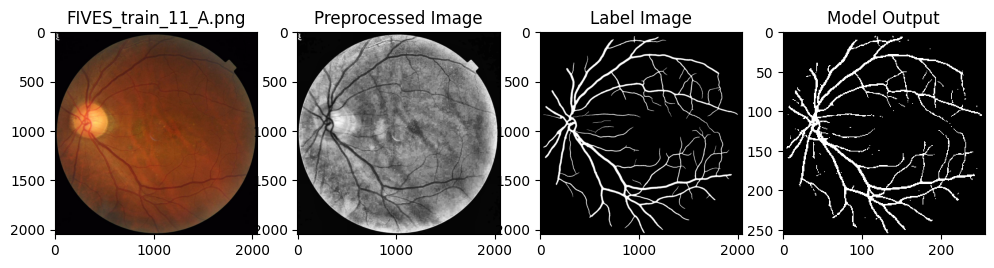

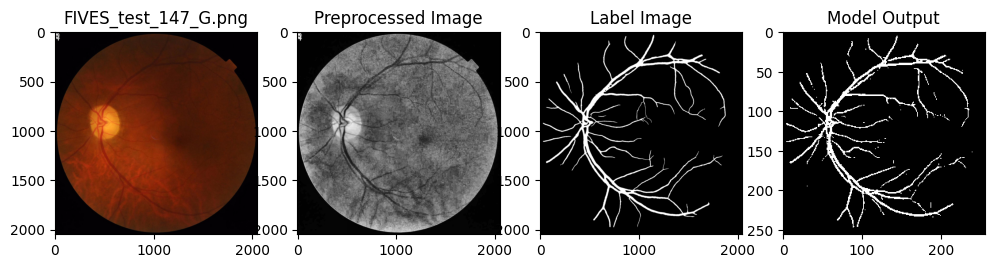

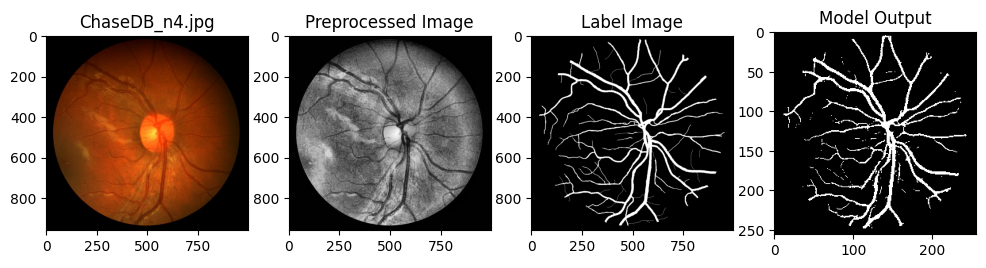

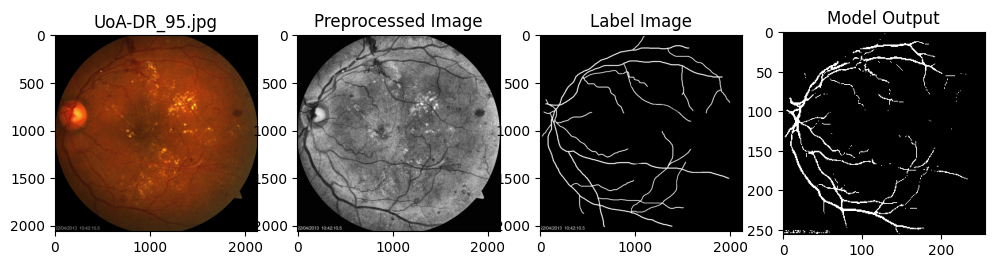

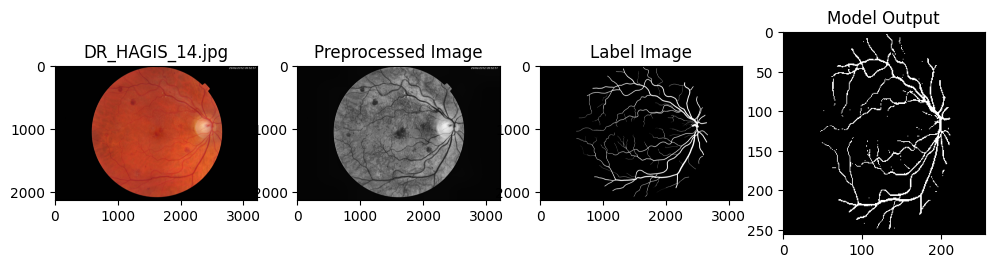

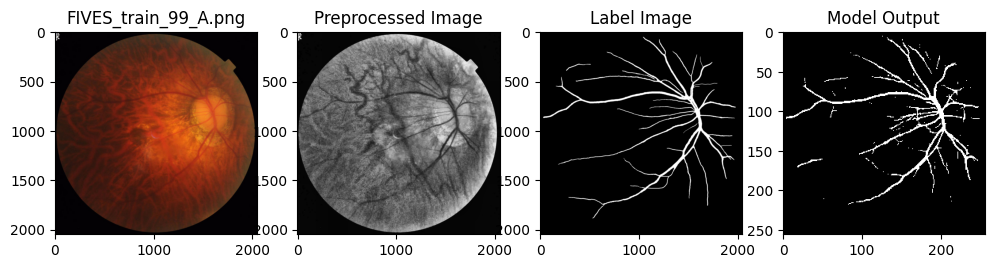

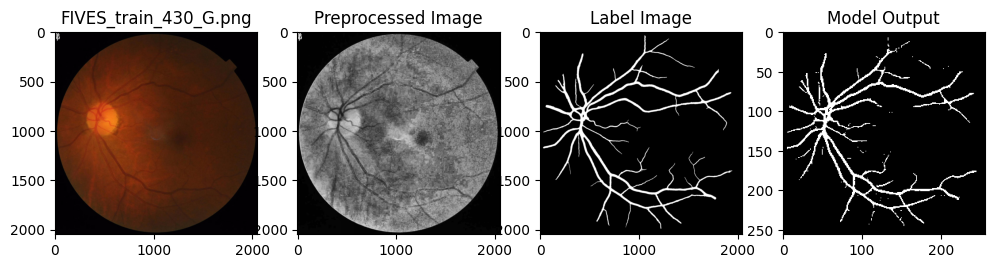

In [3]:
num_images_to_select = 10
input_path_list = []
label_path_list = []

file_list = random.sample(os.listdir(os.path.join(SOURCE, "Images")), num_images_to_select)
for file in file_list:
    for label_file in os.listdir(os.path.join(SOURCE, "Labels")):
        if label_file[:-3] == file[:-3]:
            input_path_list.append(os.path.join(SOURCE, "Images", file))
            label_path_list.append(os.path.join(SOURCE, "Labels", label_file))


# Plot model result
for i in range(0, num_images_to_select):
    check_result_full_size.visualize_result(model, test_preproc, input_path_list[i], label_path_list[i])